In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns




c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iqbalmaulana/indonesian-news-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\iqbalmaulana\indonesian-news-dataset\versions\1


# EDA

In [3]:
print(os.listdir(path))

['data.csv']


In [4]:
csv_path = os.path.join(path, 'data.csv')

In [5]:
df = pd.read_csv(csv_path)

In [6]:
print(df.head)

<bound method NDFrame.head of           id    source                                              title  \
0         83     tempo  Depo Plumpang Terbakar, Anggota DPR Minta Pert...   
1         84     tempo  Jokowi Perintahkan Wapres Ma'ruf Amin Tinjau L...   
2         85     tempo  HNW Mendukung Jamaah Umroh First Travel Dapatk...   
3         86     tempo  Tim Dokkes Polri Telah Terima 14 Kantong Jenaz...   
4         87     tempo  Bamsoet Ajak Komunitas Otomotif Kembangkan Per...   
...      ...       ...                                                ...   
32730  63563  kumparan  5 Hewan Aneh yang Hidup di Palung Mariana, Sal...   
32731  63564  kumparan  Biadab! Guru SD di Banyuwangi Cabuli Siswinya,...   
32732  63565  kumparan  Aji Santoso: Jakmania Perlakukan Persebaya den...   
32733  63566  kumparan  Sopir Audi Cium Kaki Ibu & Istri Hamil Usai Si...   
32734  63567     tempo          Ini Besaran Biaya Haji 2023 per Embarkasi   

                                             

In [7]:
print("\Info Dataset")
print(df.info())

\Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          32735 non-null  int64 
 1   source      32735 non-null  object
 2   title       32735 non-null  object
 3   image       32575 non-null  object
 4   url         32735 non-null  object
 5   content     32294 non-null  object
 6   date        32735 non-null  object
 7   embedding   32735 non-null  object
 8   created_at  32735 non-null  object
 9   updated_at  32735 non-null  object
 10  summary     32725 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB
None


In [8]:
print("\nJumlah data duplikat:", df.duplicated().sum())
print("Jumlah data kosong:\n", df.isnull().sum())


Jumlah data duplikat: 0
Jumlah data kosong:
 id              0
source          0
title           0
image         160
url             0
content       441
date            0
embedding       0
created_at      0
updated_at      0
summary        10
dtype: int64


In [9]:
# Jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# Hanya jumlah baris saja
print("Jumlah baris:", len(df))

Jumlah baris dan kolom: (32735, 11)
Jumlah baris: 32735


In [10]:
print(df[df['content'].isnull()])

          id         source  \
75     34593   cnnindonesia   
127    10328   cnnindonesia   
305     3654  cnbcindonesia   
319     4623   cnnindonesia   
321    15487  cnbcindonesia   
...      ...            ...   
32460  63285   cnnindonesia   
32462  63287  cnbcindonesia   
32516  63342   cnnindonesia   
32527  63354  cnbcindonesia   
32661  63491  cnbcindonesia   

                                                   title  \
75     FOTO: Demo 212 Tolak Israel, Perppu Ciptaker D...   
127    Jejak Transaksi Janggal Rp300 Triliun yang Diu...   
305    Heroik! Tentara Ukraina Berjuang Sampai Akhir ...   
319    Detik-Detik Mario Aniaya David yang Terekam da...   
321    Respons Latihan Korsel-AS, Korut Tembak Rudal ...   
...                                                  ...   
32460  FOTO: Legenda Pusat Industri Parsel Jalan Haji...   
32462  Mau Lebaran, Masyarakat Serbu Layanan Tukar Ua...   
32516  INFOGRAFIS: Jadwal One Way dan Contra Flow Aru...   
32527     Potret China Siag

## Drop data dengan kolom yang kosong
Data dengan kolom, content, summary, image. Total data yang dihapus ada 611 baris data.

In [11]:
df.dropna(subset=['content'], inplace=True)

In [12]:
df.dropna(subset=['summary'], inplace=True)

In [13]:
df.dropna(subset=['image'], inplace=True)

Cek lagi jumlah data setleah di drop

In [14]:

# Jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# Hanya jumlah baris saja
print("Jumlah baris:", len(df))

Jumlah baris dan kolom: (32127, 11)
Jumlah baris: 32127


In [15]:
print("\nJumlah data duplikat:", df.duplicated().sum())
print("Jumlah data kosong:\n", df.isnull().sum())


Jumlah data duplikat: 0
Jumlah data kosong:
 id            0
source        0
title         0
image         0
url           0
content       0
date          0
embedding     0
created_at    0
updated_at    0
summary       0
dtype: int64


In [16]:
df = df[:1000]

In [17]:
print("Jumlah baris dan kolom:", df.shape)
print("Jumlah baris:", len(df))

Jumlah baris dan kolom: (1000, 11)
Jumlah baris: 1000


In [18]:
df['content_length'] = df['content'].apply(lambda x: len(x.split()))
print("\nStatistik panjang berita:")
print(df['content_length'].describe())


Statistik panjang berita:
count    1000.000000
mean      350.359000
std       151.086151
min        26.000000
25%       256.750000
50%       328.000000
75%       423.250000
max      1193.000000
Name: content_length, dtype: float64


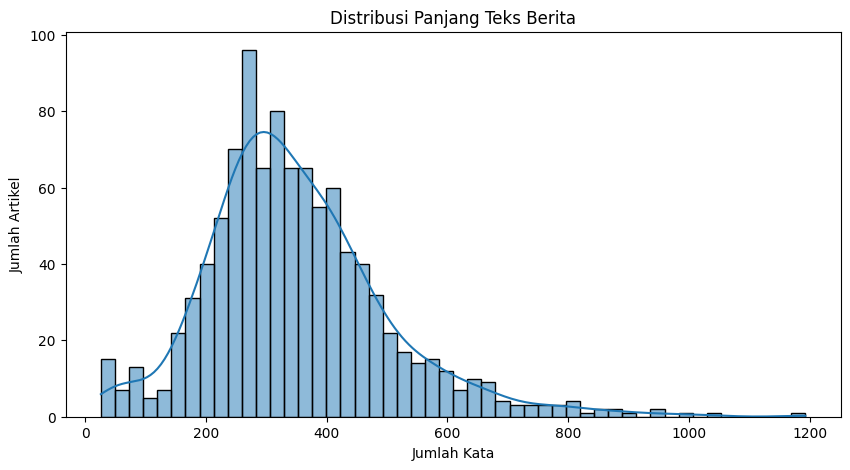

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['content_length'], bins=50, kde=True)
plt.title("Distribusi Panjang Teks Berita")
plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah Artikel")
plt.show()


Jumlah berita per sumber:
 source
tempo            454
cnbcindonesia    245
cnnindonesia     232
kumparan          47
okezone           20
jawapos            2
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_40712\4163127188.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')


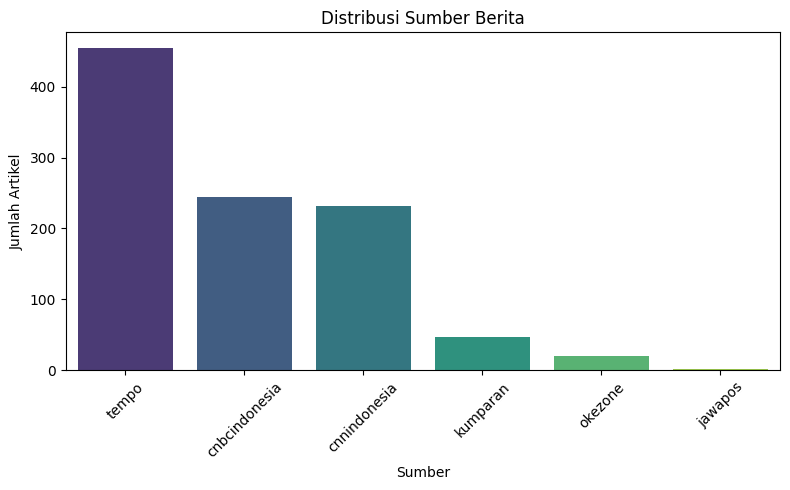

In [20]:
source_counts = df['source'].value_counts()

print("Jumlah berita per sumber:\n", source_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
plt.title('Distribusi Sumber Berita')
plt.xlabel('Sumber')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

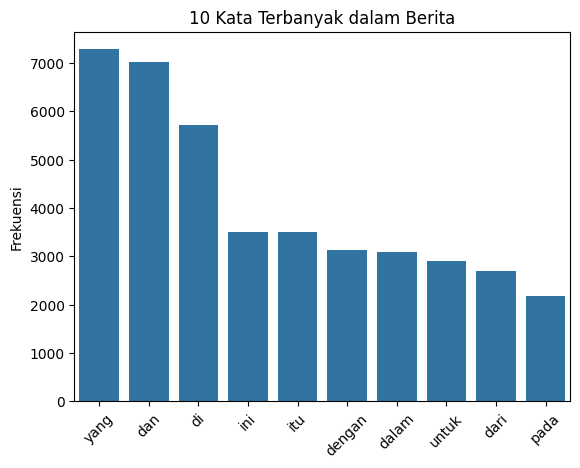

In [21]:
from collections import Counter
import re

all_words = ' '.join(df['content'].dropna()).lower()
all_words = re.findall(r'\b\w+\b', all_words)

word_freq = Counter(all_words).most_common(10)

words, counts = zip(*word_freq)
sns.barplot(x=list(words), y=list(counts))
plt.title("10 Kata Terbanyak dalam Berita")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.show()

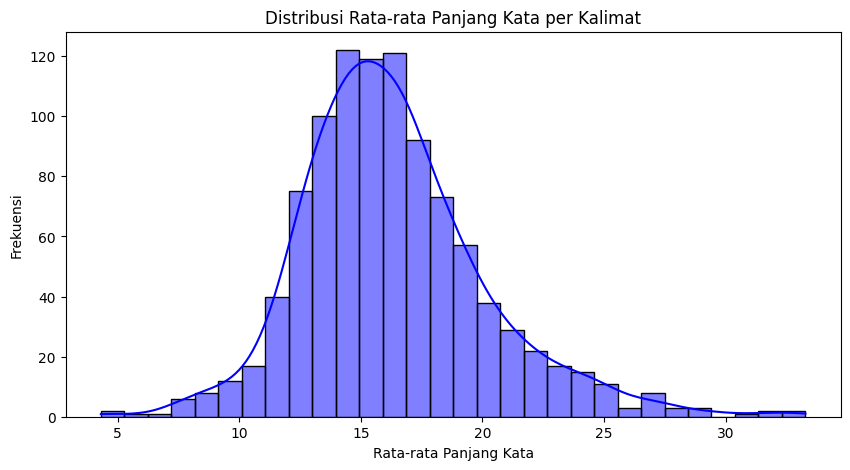

In [23]:
def calculate_words_per_sentence(text):
    sentences = re.split(r'[.!?]', text) 
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()] 
    words_per_sentence = [len(sentence.split()) for sentence in sentences]  
    return words_per_sentence

df['words_per_sentence'] = df['content'].apply(lambda x: calculate_words_per_sentence(str(x)))

df['avg_words_per_sentence'] = df['words_per_sentence'].apply(lambda x: sum(x) / len(x) if x else 0)

plt.figure(figsize=(10, 5))
sns.histplot(df['avg_words_per_sentence'], bins=30, kde=True, color='blue')
plt.title("Distribusi Rata-rata Panjang Kata per Kalimat")
plt.xlabel("Rata-rata Panjang Kata")
plt.ylabel("Frekuensi")
plt.show()

# Preprocessing

In [107]:
!pip install sastrawi


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.tokenize import RegexpTokenizer

In [25]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [32]:
def preprocess_sentence(sentence):
    # Case folding
    sentence = sentence.lower()
    # Tokenisasi
    tokens = word_tokenize(sentence)
    # Stopword removal
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)

In [33]:
def split_and_preprocess(text):
    sentences = sent_tokenize(text)  
    original_sentences = sentences  
    processed_sentences = [preprocess_sentence(sentence) for sentence in sentences]  # Versi preprocessing
    return pd.DataFrame({
        'original_sentence': original_sentences,
        'processed_sentence': processed_sentences
    })

In [34]:
all_sentences = []
for idx, row in df.iterrows():
    if pd.notnull(row['content']):
        sentences_df = split_and_preprocess(row['content'])
        sentences_df['document_id'] = idx 
        all_sentences.append(sentences_df)

all_sentences_df = pd.concat(all_sentences, ignore_index=True)


In [35]:
all_sentences_df.to_csv("data/preprocessed_sentences.csv", index=False)

print(all_sentences_df.head())

                                                                                                                                                                                                                                                                                                       original_sentence  \
0                                                                                                                            TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI Rofik Hananto menyayangkan terjadinya insiden kebakaran yang disebabkan oleh bocornya depo Plumpang, Jakarta Utara, pada Jumat, 3 Maret 2023.   
1                                                                                                                                                                                                                   "Turut berbela sungkawa terhadap masyarakat sipil yang terdampak, apalagi ini daerah padat penduduk.   
2  Pertamina harus tanggung jawab," kata dia dalam k

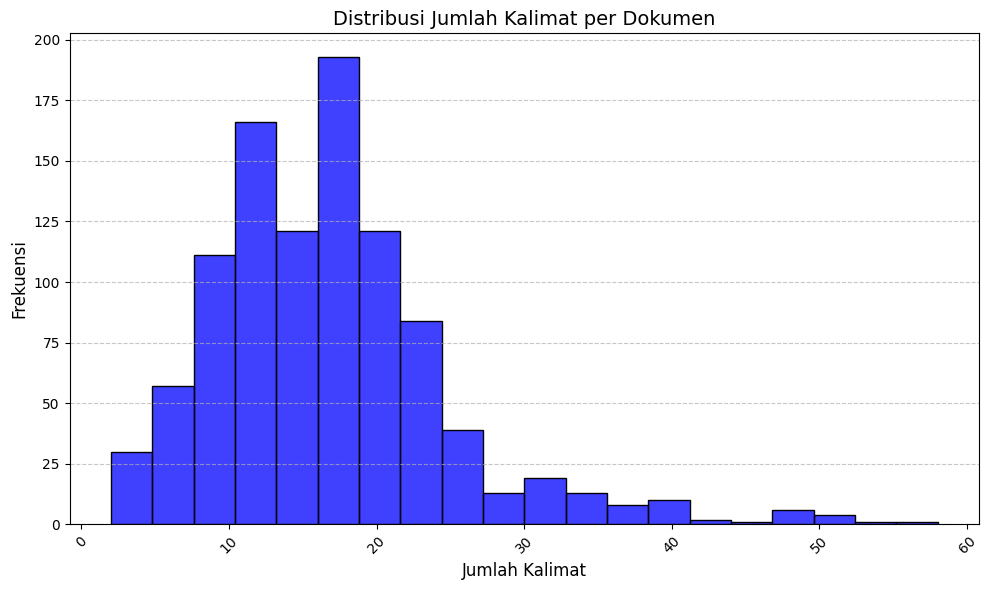

In [37]:
sentence_counts = all_sentences_df['document_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(sentence_counts, bins=20, kde=False, color='blue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Distribusi Jumlah Kalimat per Dokumen", fontsize=14)
plt.xlabel("Jumlah Kalimat", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.tight_layout()
plt.show()

In [38]:
from IPython.display import display

display(all_sentences_df.head(20))  

,original_sentence,processed_sentence,document_id
0,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI Rofik Hananto menyayangkan terjadinya insiden kebakaran yang disebabkan oleh bocornya depo Plumpang, Jakarta Utara, pada Jumat, 3 Maret 2023.",tempo co jakarta - anggota komisi vii dpr ri rofik hananto sayang insiden bakar sebab bocor depo plumpang jakarta utara jumat 3 maret 2023,0
1,"""Turut berbela sungkawa terhadap masyarakat sipil yang terdampak, apalagi ini daerah padat penduduk.",bela sungkawa masyarakat sipil dampak daerah padat duduk,0
2,"Pertamina harus tanggung jawab,"" kata dia dalam keterangan di Jakarta Sabtu, 4 Maret 2024.Rofik mengatakan Pertamina serta pihak terkait harus memastikan keselamatan dan keamanan warga yang tinggal di sekitar lokasi.Pipa BBM yang terbakar itu merupakan bagian dari Terminal Bahan Bakar Minyak (TBBM) Plumpang.",pertamina tanggung terang jakarta sabtu 4 maret 2024 rofik pertamina kait selamat aman warga tinggal lokasi pipa bbm bakar terminal bahan bakar minyak tbbm plumpang,0
3,"TBBM Plumpang dinilai sebagai salah satu terminal BBM terpenting di Indonesia, sehingga Rofik juga menegaskan Pertamina harus memastikan pasokan bahan bakar minyak tetap aman meski ada insiden tersebut.",tbbm plumpang nilai salah terminal bbm penting indonesia rofik pertamina pasok bahan bakar minyak aman insiden,0
4,"""Plumpang menyuplai sekitar 20 persen kebutuhan BBM harian di Indonesia, atau sekitar 25 persen dari total kebutuhan SPBU Pertamina.",plumpang suplai 20 persen butuh bbm hari indonesia 25 persen total butuh spbu pertamina,0
5,"Maka tindakan selanjutnya adalah bagaimana memastikan suplai BBM tidak terganggu,"" katanya.Rofik juga menyinggung kejadian kilang minyak milik Pertamina yang sebelumnya pernah terjadi kejadian serupa, seperti Kilang Balikpapan pada Maret 2022 lalu.",tindak suplai bbm ganggu kata rofik singgung jadi kilang minyak milik pertamina jadi kilang balikpapan maret 2022,0
6,"Terhitung 2 tahun terakhir ini, kata dia, sudah 5 fasilitas migas milik Pertamina mengalami insiden kebakaran.",hitung 2 5 fasilitas migas milik pertamina alami insiden bakar,0
7,"""Menyayangkan terjadinya musibah kebakaran ini, apalagi insiden kebakaran bukan kali pertama di fasilitas migas, ini terus berulang.",sayang musibah bakar insiden bakar kali fasilitas migas ulang,0
8,"Pertamina harus benahi sistem pengamanan dan SOP yang ada,"" kata dia.Rofik mengharapkan adanya pembenahan menyeluruh terhadap sistem pengamanan serta SOP yang ada dalam lingkup Pertamina untuk mengamankan baik fasilitas migas, pekerja, maupun masyarakat sekitar.",pertamina benah sistem aman sop dia rofik harap benah sistem aman sop lingkup pertamina aman fasilitas migas kerja masyarakat,0
9,Menurutnya pembenahan diperlukan agar Pertamina tidak abai terhadap aspek pengamanan fasilitas migas.,turut benah pertamina abai aspek aman fasilitas migas,0
